In [1]:
#PArt 1 of Rubric: Data is about India, India Rainfall Data and India Agricultural/crop yield data

# Part 2 of Rubric: Research Questions: 1) Which whole year Turmeric, Arecanut, or Banana crop yield rations affected by rainfall amounts?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import data

rainfall = pd.read_csv("Sub_Division_IMD_2017.csv")
crop_yield = pd.read_csv("crop_production.csv")

#drop null values in both dataframes

rainfall = rainfall.dropna()
crop_yield = crop_yield.dropna()

#drop rows with Summer, Winter, and Autumn Season, due to ambiguous season timelines.

crop_yield = crop_yield[~crop_yield.Season.isin(["Summer     ", 'Autumn     ', 'Winter     ', 'Rabi       ', "Kharif     "])]

#only keep data from 1997-2016 (inclusive)

rainfall = rainfall[(rainfall.YEAR > 1996) & (rainfall.YEAR < 2017)]
crop_yield = crop_yield[(crop_yield.Crop_Year > 1996) & (crop_yield.Crop_Year < 2016)]

#

#get average rainfall in India by year
rainfall = rainfall.groupby('YEAR').mean()


#create Kharif (April-October) and Rabi (September to April) Rainfall amount columns
#rainfall['Kharif Season Rain'] = rainfall.APR + rainfall.MAY + rainfall.JUN + rainfall.JUL + rainfall.AUG + rainfall.SEP + rainfall.OCT


#rabi_rain = []
#for i in rainfall.index:
#i = 1997
#while i <2016:
   # rabi_rain.append(rainfall.loc[i, "SEP"] + rainfall.loc[i, "OCT"] + rainfall.loc[i, "NOV"] + rainfall.loc[i, "DEC"] + rainfall.loc[i+1, "JAN"] + rainfall.loc[i+1, "FEB"] + rainfall.loc[i+1, "MAR"] + rainfall.loc[i+1, "APR"])
   # i+=1

#drop 2016 data
rainfall = rainfall[~(rainfall.index == 2016)]

#Add Rabi Season Rain column
#rainfall['Rabi Season Rain'] = rabi_rain

#delete irrelevant columns from rainfall dataframe
rainfall = rainfall.drop(columns = ['JAN', 'FEB', "MAR", "APR", 'MAY', "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", "JF", "MAM", "JJAS", "OND"])

rainfall.head(100)

,ANNUAL
YEAR,
1997,1416.175000
1998,1526.777778
1999,1388.022222
2000,1324.188571
2001,1302.702778
2002,1148.830556
2003,1354.463889
2004,1298.700000
2005,1456.430556


In [2]:

                        
crop_yield = pd.DataFrame(crop_yield.groupby(['Crop_Year', 'Crop']).sum())

crop_yield["Yield Ratio"] = crop_yield["Production"]/crop_yield["Area"]

#convert crop_yield indexes to columns
crop_yield['Year'] =crop_yield.index.get_level_values(0)
crop_yield['Crop'] = crop_yield.index.get_level_values(1)



crop_yield.head(100)


Area    Production  Yield Ratio  Year  \
Crop_Year Crop                                                       
1997      Arecanut       260686.0  3.085840e+05     1.183738  1997   
          Arhar/Tur       73983.0  3.770100e+04     0.509590  1997   
          Bajra          168594.0  2.119700e+05     1.257281  1997   
          Banana         129853.0  5.815359e+06    44.784171  1997   
          Barley           6116.0  5.034000e+03     0.823087  1997   
...                           ...           ...          ...   ...   
2000      Cardamom        62583.0  8.916000e+03     0.142467  2000   
          Cashewnut      326553.0  1.179400e+05     0.361166  2000   
          Coconut       1437242.0  6.880408e+09  4787.230061  2000   
          Coriander      346677.0  2.281070e+05     0.657981  2000   
          Dry chillies   497057.0  3.839470e+05     0.772441  2000   

                                Crop  
Crop_Year Crop                        
1997      Arecanut          Arecanut  
          Arhar/Tur        Arhar/Tur  
          Bajra                Bajra  
          Banana              Banana  
          Barley              Barley  
...                              ...  
2000      Cardamom          Cardamom  
          Cashewnut        Cashewnut  
          Coconut           Coconut   
          Coriander        Coriander  
          Dry chillies  Dry chillies  

[100 rows x 5 columns]

In [3]:
#merge rainfall and crop_yield dataframe

rainfall_yield = rainfall.merge(crop_yield, left_index=True, right_on = 'Year')

#reset index of rainfall_yield df
rainfall_yield.reset_index(drop=True, inplace=True)

#correct column values in rainfall_yield
#rainfall_yield['Season'] = rainfall_yield['Season'].map({'Whole Year ': "Whole Year"})         

#create Seasonal Rainfall Column 
#rainfall_yield["Seasonal Rainfall"] = 0

#find the amount of rain during the relevant season for each crop
#for i in range(len(rainfall_yield)):
 #   if rainfall_yield.loc[i, "Season"] == "Whole Year":
  #      rainfall_yield.loc[i, "Seasonal Rainfall"] = rainfall_yield.loc[i, "ANNUAL"]
   # elif rainfall_yield.loc[i, "Season"] == "Kharif":
    #    rainfall_yield.loc[i, "Seasonal Rainfall"] = rainfall_yield.loc[i, "Kharif Season Rain"]
    #elif rainfall_yield.loc[i, "Season"] == "Rabi":
     #   rainfall_yield.loc[i, "Seasonal Rainfall"] = rainfall_yield.loc[i, "Rabi Season Rain"]

rainfall_yield.head(100)

,ANNUAL,Area,Production,Yield Ratio,Year,Crop
0,1416.175000,260686.0,3.085840e+05,1.183738,1997,Arecanut
1,1416.175000,73983.0,3.770100e+04,0.509590,1997,Arhar/Tur
2,1416.175000,168594.0,2.119700e+05,1.257281,1997,Bajra
3,1416.175000,129853.0,5.815359e+06,44.784171,1997,Banana
4,1416.175000,6116.0,5.034000e+03,0.823087,1997,Barley
...,...,...,...,...,...,...
95,1324.188571,62583.0,8.916000e+03,0.142467,2000,Cardamom
96,1324.188571,326553.0,1.179400e+05,0.361166,2000,Cashewnut
97,1324.188571,1437242.0,6.880408e+09,4787.230061,2000,Coconut
98,1324.188571,346677.0,2.281070e+05,0.657981,2000,Coriander


In [4]:
#combine crop and season
#rainfall_yield["Crop and Season"] = rainfall_yield['Crop'] + "-" + rainfall_yield["Season"]

#drop unncessary columns from rainfall_yield
rainfall_yield = rainfall_yield.drop(columns = ["Area", "Production", "Year"])

#rainfall_yield.rename(columns={'Crop and Season': 'Crop'}, inplace=True)

#rainfall_yield = rainfall_yield.sort_values(by=["Yield Ratio"], ascending = False)


rainfall_yield.head(100)





,ANNUAL,Yield Ratio,Crop
0,1416.175000,1.183738,Arecanut
1,1416.175000,0.509590,Arhar/Tur
2,1416.175000,1.257281,Bajra
3,1416.175000,44.784171,Banana
4,1416.175000,0.823087,Barley
...,...,...,...
95,1324.188571,0.142467,Cardamom
96,1324.188571,0.361166,Cashewnut
97,1324.188571,4787.230061,Coconut
98,1324.188571,0.657981,Coriander


In [5]:
rainfall_yield = rainfall_yield.pivot(index= "ANNUAL", columns='Crop', values='Yield Ratio')

rainfall_yield = rainfall_yield[["Arecanut", "Turmeric", "Banana"]]


rainfall_yield.head(100)

Crop,Arecanut,Turmeric,Banana
ANNUAL,,,
1148.830556,0.991162,1.220225,21.258999
1192.760000,3.804724,4.969726,30.990513
1243.557143,5.654888,3.082229,25.351786
1244.336111,6.656049,3.248895,12.668995
1298.700000,1.210846,4.611980,27.342955
1302.702778,1.134572,3.059523,20.185025
1324.188571,1.156338,3.915035,22.092667
1354.463889,1.182500,3.779158,29.852557
1367.394444,3.740465,4.957184,30.073230


In [6]:
rainfall_yield.reset_index(inplace=True)

rainfall_yield.head(100)

Crop,ANNUAL,Arecanut,Turmeric,Banana
0,1148.830556,0.991162,1.220225,21.258999
1,1192.760000,3.804724,4.969726,30.990513
2,1243.557143,5.654888,3.082229,25.351786
3,1244.336111,6.656049,3.248895,12.668995
4,1298.700000,1.210846,4.611980,27.342955
5,1302.702778,1.134572,3.059523,20.185025
6,1324.188571,1.156338,3.915035,22.092667
7,1354.463889,1.182500,3.779158,29.852557
8,1367.394444,3.740465,4.957184,30.073230
9,1388.022222,0.937688,3.291882,24.338282


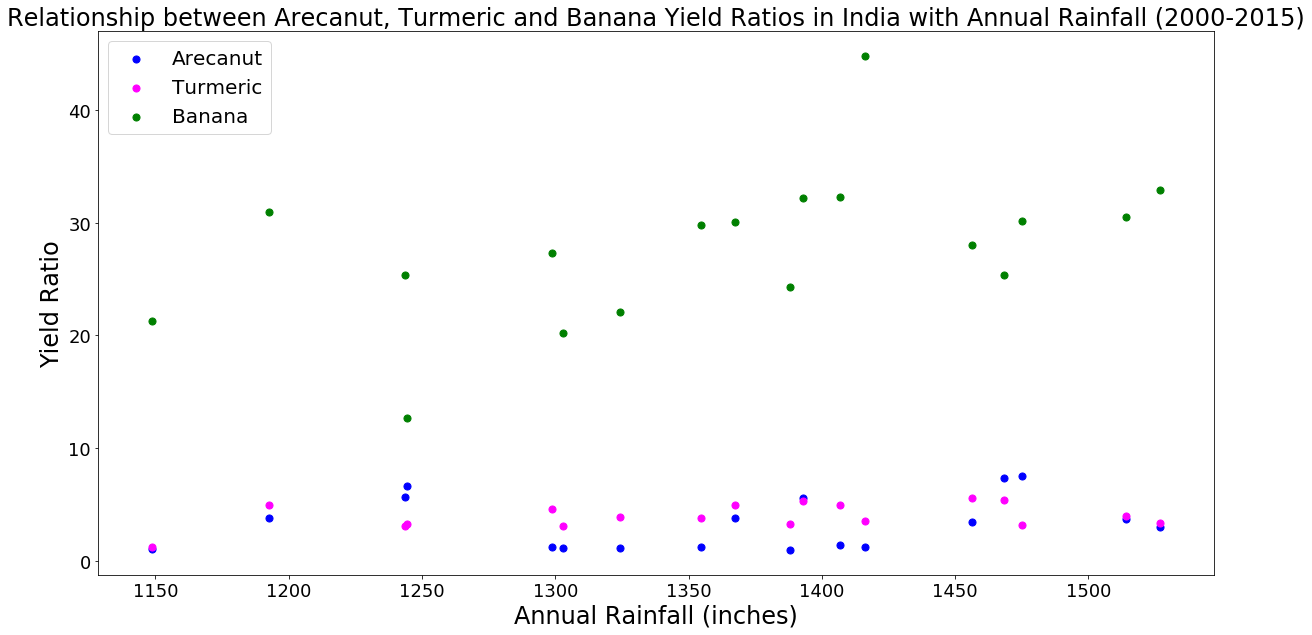

In [29]:
ax1 = rainfall_yield.plot(kind='scatter', x='ANNUAL', y='Arecanut', color='blue', figsize=(20, 10), s =50)
rainfall_yield.plot(kind='scatter', x='ANNUAL', y='Turmeric', color='magenta', figsize=(20, 10), s = 50, ax=ax1)
rainfall_yield.plot(kind='scatter', x='ANNUAL', y='Banana', color='green', figsize=(20, 10), s = 50, ax=ax1)
plt.legend(labels=['Arecanut', 'Turmeric', 'Banana'], prop={'size': 20}, loc = "upper left")
plt.title('Relationship between Arecanut, Turmeric and Banana Yield Ratios in India with Annual Rainfall (2000-2015)', size=24)
plt.xlabel('Annual Rainfall (inches)', size=24)
plt.ylabel('Yield Ratio', size=24)

ax1.tick_params(labelsize=18)

plt.show()